# Classifier

### Importing Libraries

In [1]:
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

Using TensorFlow backend.


### Importing Data



In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Classifier.csv to Classifier.csv
Saving Normal.csv to Normal.csv
Saving Read.csv to Read.csv
Saving Sleep.csv to Sleep.csv
User uploaded file "Classifier.csv" with length 503636 bytes
User uploaded file "Normal.csv" with length 565 bytes
User uploaded file "Read.csv" with length 578 bytes
User uploaded file "Sleep.csv" with length 455 bytes


In [0]:
df = pd.read_csv('Classifier.csv',sep=',')

### Maniplating and Pre-Processing Data

Performing One-Hot Encoding

In [4]:
df['ISleep'] = (df["Mode"] == 0)*1.0
df['IRead'] = (df["Mode"] == 1)*1.0
df['INormal'] = (df["Mode"] == 2)*1.0

df['OSleep'] = (df["Output"] == 0)*1.0
df['ORead'] = (df["Output"] == 1)*1.0
df['ONormal'] = (df["Output"] == 2)*1.0
df['Deactivate'] = (df["Output"] == -1)*1.0

print (df.describe())

               0-1          1-2  ...      ONormal   Deactivate
count  9072.000000  9072.000000  ...  9072.000000  9072.000000
mean      0.041667     0.041667  ...     0.076389     0.500000
std       0.199837     0.199837  ...     0.265634     0.500028
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.000000     0.000000  ...     0.000000     0.000000
50%       0.000000     0.000000  ...     0.000000     0.500000
75%       0.000000     0.000000  ...     0.000000     1.000000
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 34 columns]


Setting Parameters

In [0]:
X = df[["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10","10-11","11-12","12-13","13-14","14-15","15-16","16-17","17-18","18-19","19-20","20-21","21-22","22-23","23-24","PIR","IRead","ISleep","INormal"]]
y = df[["OSleep", "ORead","ONormal","Deactivate"]]

### Creating and Evaluating Model

In [6]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.add(Dense(4, activation = 'sigmoid'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                348       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
Total params: 508
Trainable params: 508
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Training Model

In [9]:
model.fit(X, y, epochs=20, batch_size=10)

Array, accuracy = model.evaluate(X, y)


print('Accuracy: %.2f' % (accuracy*100))




Epoch 1/20





9072/9072 [==============================] - 2s 256us/step - loss: 0.5021 - acc: 0.8044
Epoch 2/20
9072/9072 [==============================] - 1s 160us/step - loss: 0.3669 - acc: 0.8830
Epoch 3/20
9072/9072 [==============================] - 1s 162us/step - loss: 0.3261 - acc: 0.8870
Epoch 4/20
9072/9072 [==============================] - 1s 155us/step - loss: 0.2222 - acc: 0.9649
Epoch 5/20
9072/9072 [==============================] - 1s 155us/step - loss: 0.1436 - acc: 0.9808
Epoch 6/20
9072/9072 [==============================] - 1s 161us/step - loss: 0.1145 - acc: 0.9806
Epoch 7/20
9072/9072 [==============================] - 1s 161us/step - loss: 0.0973 - acc: 0.9808
Epoch 8/20
9072/9072 [==============================] - 1s 161us/step - loss: 0.0860 - acc: 0.9806
Epoch 9/20
9072/9072 [==============================] - 2s 169us/step - loss: 0.0781 - acc: 0.9808
Epoch 10/20
9072/9072 [==============================] - 1s 151us/step - loss: 0.0721 - acc: 0.9809
E

### Predicting the Output

In [20]:
Prediction = model.predict(X)


Possible_Outputs = ["Sleep","Read","Normal","Dectivate"]

Predicted_class = np.argmax(Prediction,axis=-1)
print (Predicted_class)
print (Possible_Outputs[Predicted_class[9000]])

[0 0 0 ... 3 3 3]
Dectivate


# Intensity Predictor


### Importing Libraries

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset


### Importing Data

In [0]:
sleep = pd.read_csv('Sleep.csv',sep=',')
read = pd.read_csv('Read.csv',sep=',')
normal = pd.read_csv('Normal.csv',sep=',')

### Linear Regression

In [0]:

def Training(x,y,training_epochs,learning_rate):
	
	b = float(y.max())
	W = float((-1*y.max())/x.max())
	
	W = tf.Variable(W, name = "W") 
	b = tf.Variable(b, name = "b") 
	
	X = tf.placeholder("float")
	Y = tf.placeholder("float")

	n = len(x)
	# Hypothesis 
	y_pred = tf.add(tf.multiply(X, W), b)
	
	# Mean Squared Error Cost Function 
	cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

	# Gradient Descent Optimizer
	optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

	# Global Variables Initializer 
	init = tf.global_variables_initializer() 

	# Starting the Tensorflow Session 
	with tf.Session() as sess: 
		# Initializing the Variables 
		sess.run(init) 
	
		# Iterating through all the epochs 
		for epoch in range(training_epochs): 
			
			# Feeding each data point into the optimizer using Feed Dictionary 
			for (_x, _y) in zip(x, y): 
				sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
			# Displaying the result after every 50 epochs 
			if (epoch + 1) % 50 == 0: 
				# Calculating the cost a every epoch 
				c = sess.run(cost, feed_dict = {X : x, Y : y}) 
				print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
		# Storing necessary values to be used outside the Session 
		training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
		weight = sess.run(W) 
		bias = sess.run(b) 

	# Calculating the predictions 
	predictions = weight * x + bias 
	print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

	# Plotting the Results 
	plt.plot(x, y, 'ro', label ='Original data') 
	plt.plot(x, predictions, label ='Fitted line') 
	plt.title('Linear Regression Result') 
	plt.legend() 
	plt.show()

	return weight,bias
	

### Visualising Data

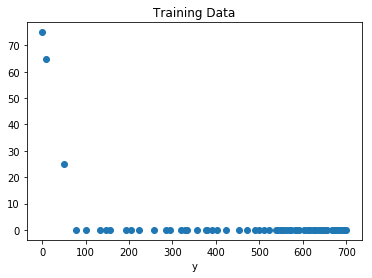

In [14]:
x_sleep = sleep["Intensity"]
y_sleep = sleep["Output"]

# Plot of Training Data 
plt.scatter(x_sleep, y_sleep) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

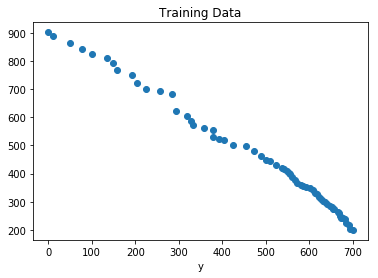

In [15]:
x_read = read["Intensity"]
y_read = read["Output"]

# Plot of Training Data 
plt.scatter(x_read, y_read) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

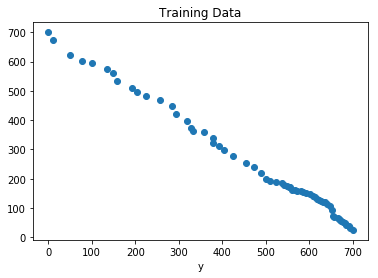

In [16]:
x_normal = normal["Intensity"]
y_normal = normal["Output"]

# Plot of Training Data 
plt.scatter(x_normal, y_normal) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

### Training Data

Training cost = 414.2367 Weight = -0.10848554 bias = 74.988174 



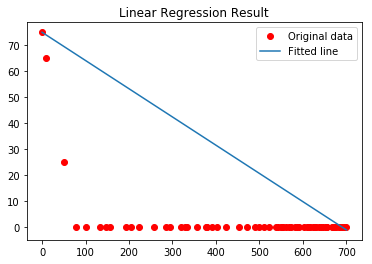

In [17]:
Weight_sleep,Bias_sleep =  Training(x_sleep,y_sleep,learning_rate = 0.0003,training_epochs = 10)

Epoch 50 : cost = 332.8919 W = -0.9087302 b = 902.01733
Epoch 100 : cost = 332.8904 W = -0.90875155 b = 902.0326
Epoch 150 : cost = 332.87918 W = -0.90877223 b = 902.0466
Epoch 200 : cost = 332.881 W = -0.908789 b = 902.0588
Epoch 250 : cost = 332.87753 W = -0.9088063 b = 902.071
Epoch 300 : cost = 332.85114 W = -0.9088263 b = 902.0832
Epoch 350 : cost = 332.87396 W = -0.90884066 b = 902.0954
Epoch 400 : cost = 332.84192 W = -0.9088613 b = 902.1076
Epoch 450 : cost = 332.85318 W = -0.90887696 b = 902.1198
Epoch 500 : cost = 332.85312 W = -0.90889394 b = 902.132
Training cost = 332.85312 Weight = -0.90889394 bias = 902.132 



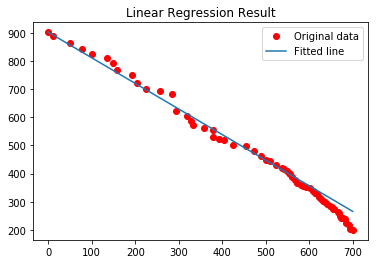

In [18]:
Weight_read,Bias_read =  Training(x_read,y_read,learning_rate = 0.0003,training_epochs = 500)

Epoch 50 : cost = 2133.5425 W = -0.82538176 b = 699.9645
Epoch 100 : cost = 2133.0056 W = -0.8253297 b = 699.92786
Epoch 150 : cost = 2132.5195 W = -0.82527614 b = 699.89124
Epoch 200 : cost = 2131.9946 W = -0.82522374 b = 699.8546
Epoch 250 : cost = 2131.4473 W = -0.82517207 b = 699.818
Epoch 300 : cost = 2130.9207 W = -0.82511973 b = 699.7814
Epoch 350 : cost = 2130.362 W = -0.8250684 b = 699.74475
Epoch 400 : cost = 2129.9658 W = -0.8250121 b = 699.7081
Epoch 450 : cost = 2129.5127 W = -0.82495755 b = 699.6715
Epoch 500 : cost = 2128.9624 W = -0.824906 b = 699.6349
Training cost = 2128.9624 Weight = -0.824906 bias = 699.6349 



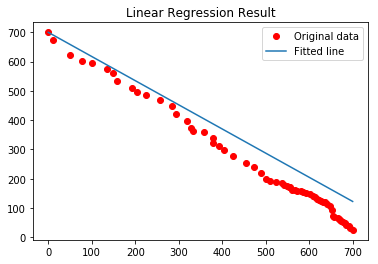

In [19]:
Weight_normal,Bias_normal =  Training(x_normal,y_normal,learning_rate = 0.0003,training_epochs = 500)